In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('moscow_flats_dataset.csv')

In [3]:
col_to_drop = ['link']

In [4]:
df.shape

(6983, 13)

In [5]:
df.head()

,price,min_to_metro,region_of_moscow,total_area,living_area,floor,number_of_floors,construction_year,is_new,is_apartments,ceiling_height,number_of_rooms,link
0,31633073.0,24.0,ЮАО,64.2,32.4,11.0,16.0,2023.0,1.0,0.0,3.15,2.0,https://www.cian.ru/sale/flat/293204033/
1,29293000.0,9.0,СВАО,78.1,NaN,9.0,27.0,2022.0,1.0,0.0,NaN,2.0,https://www.cian.ru/sale/flat/294033524/
2,30349669.0,5.0,ЮАО,72.4,33.6,3.0,24.0,2023.0,1.0,0.0,3.15,2.0,https://www.cian.ru/sale/flat/300712697/
3,31845511.0,19.0,ЮАО,69.2,NaN,2.0,12.0,2024.0,1.0,0.0,2.97,2.0,https://www.cian.ru/sale/flat/300228448/
4,38810000.0,27.0,ЗАО,66.9,24.8,9.0,14.0,2023.0,1.0,0.0,3.00,2.0,https://www.cian.ru/sale/flat/299262105/


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6983 entries, 0 to 6982
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              6961 non-null   float64
 1   min_to_metro       6846 non-null   float64
 2   region_of_moscow   6892 non-null   object 
 3   total_area         6960 non-null   float64
 4   living_area        4514 non-null   float64
 5   floor              6960 non-null   float64
 6   number_of_floors   6960 non-null   float64
 7   construction_year  5761 non-null   float64
 8   is_new             6949 non-null   float64
 9   is_apartments      6949 non-null   float64
 10  ceiling_height     5053 non-null   float64
 11  number_of_rooms    6983 non-null   float64
 12  link               6983 non-null   object 
dtypes: float64(11), object(2)
memory usage: 709.3+ KB


Типы данных соответствуют переменным, единственное можно поменять некоторые признаки на int для экономии места
Пропусков довольно много в living_area и ceiling apartments, заполнять их по хорошему нужно, после разбиения на train/test (чтобы не было утечки таргета) Удалять или не удалять колонку living_area наверняка можно решить уже после обучения модели, сравнив ошибки с ним и без него.

In [7]:
df.describe()

,price,min_to_metro,total_area,living_area,floor,number_of_floors,construction_year,is_new,is_apartments,ceiling_height,number_of_rooms
count,6.961000e+03,6846.000000,6960.000000,4514.000000,6960.000000,6960.000000,5761.000000,6949.000000,6949.000000,5053.000000,6983.000000
mean,5.991086e+07,13.183465,84.139886,44.932455,10.519540,19.541379,2003.237806,0.267377,0.156569,3.035529,2.480596
std,9.353880e+07,77.163524,51.826896,30.813177,10.637918,14.456480,28.491038,0.442622,0.363420,0.714796,1.084983
min,8.000000e+05,1.000000,9.000000,1.000000,-1.000000,1.000000,1820.000000,0.000000,0.000000,2.000000,1.000000
25%,1.650000e+07,6.000000,45.000000,20.625000,4.000000,9.000000,1987.000000,0.000000,0.000000,2.700000,2.000000
50%,3.050000e+07,9.000000,70.850000,37.500000,7.000000,16.000000,2019.000000,0.000000,0.000000,3.000000,2.000000
75%,6.300000e+07,14.000000,106.100000,60.000000,14.000000,25.000000,2023.000000,1.000000,0.000000,3.150000,3.000000
max,3.737636e+09,2025.000000,530.000000,350.000000,80.000000,95.000000,2027.000000,1.000000,1.000000,30.000000,4.000000


Можно обратить внимание на min_to_metro - максимальное значение 2025, явно выбросы/ошибки при парсинге

In [8]:
df[df['min_to_metro']==2025]

,price,min_to_metro,region_of_moscow,total_area,living_area,floor,number_of_floors,construction_year,is_new,is_apartments,ceiling_height,number_of_rooms,link
155,32923968.0,2025.0,СЗАО,70.4,35.7,19.0,29.0,2023.0,1.0,0.0,3.15,2.0,https://www.cian.ru/sale/flat/289786214/
212,30553120.0,2025.0,СЗАО,48.1,25.3,8.0,29.0,2023.0,1.0,0.0,3.15,2.0,https://www.cian.ru/sale/flat/300359171/
271,34371540.0,2025.0,СЗАО,56.7,29.4,14.0,29.0,2023.0,1.0,0.0,3.15,2.0,https://www.cian.ru/sale/flat/296524893/
500,38945280.0,2025.0,СЗАО,70.4,35.7,22.0,29.0,2023.0,1.0,0.0,3.15,2.0,https://www.cian.ru/sale/flat/272153501/
613,31324200.0,2025.0,СЗАО,49.8,25.2,6.0,29.0,2023.0,1.0,0.0,3.15,2.0,https://www.cian.ru/sale/flat/289786200/
2105,26739900.0,2025.0,СЗАО,37.0,13.5,29.0,29.0,2023.0,1.0,0.0,3.15,1.0,https://www.cian.ru/sale/flat/289786190/
4018,47412705.0,2025.0,СЗАО,83.1,50.3,20.0,29.0,2023.0,1.0,0.0,3.15,3.0,https://www.cian.ru/sale/flat/295745237/
5450,69108000.0,2025.0,СЗАО,97.5,63.0,28.0,29.0,2023.0,1.0,0.0,3.15,4.0,https://www.cian.ru/sale/flat/289786227/
5463,226600000.0,2025.0,СЗАО,236.7,69.2,1.0,3.0,2023.0,1.0,1.0,3.10,4.0,https://www.cian.ru/sale/flat/300415728/
5522,226600000.0,2025.0,СЗАО,237.9,68.7,1.0,3.0,2023.0,1.0,1.0,3.10,4.0,https://www.cian.ru/sale/flat/300415710/


Перейдя по одной из ссылок, видно, что время до метро некорекктно спарсилось для подобных

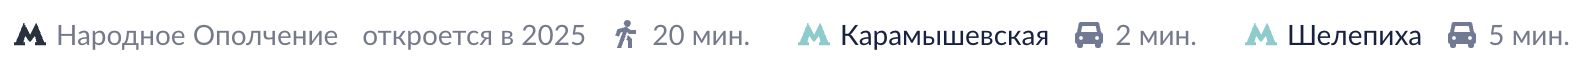

In [9]:
df = df[df['min_to_metro']!=2025]

In [10]:
df.describe()

,price,min_to_metro,total_area,living_area,floor,number_of_floors,construction_year,is_new,is_apartments,ceiling_height,number_of_rooms
count,6.951000e+03,6836.000000,6950.00000,4504.000000,6950.000000,6950.000000,5751.000000,6939.000000,6939.000000,5043.000000,6973.000000
mean,5.988706e+07,10.240492,84.11885,44.939853,10.513381,19.535252,2003.203443,0.266321,0.156507,3.035322,2.480424
std,9.355963e+07,5.715757,51.79069,30.834109,10.637719,14.460594,28.503870,0.442066,0.363361,0.715489,1.085064
min,8.000000e+05,1.000000,9.00000,1.000000,-1.000000,1.000000,1820.000000,0.000000,0.000000,2.000000,1.000000
25%,1.650000e+07,6.000000,45.00000,20.600000,4.000000,9.000000,1987.000000,0.000000,0.000000,2.700000,2.000000
50%,3.049000e+07,9.000000,70.95000,37.500000,7.000000,16.000000,2019.000000,0.000000,0.000000,3.000000,2.000000
75%,6.299500e+07,14.000000,106.10000,60.000000,13.750000,25.000000,2023.000000,1.000000,0.000000,3.150000,3.000000
max,3.737636e+09,60.000000,530.00000,350.000000,80.000000,95.000000,2027.000000,1.000000,1.000000,30.000000,4.000000


Также явно аномальное значение высоты потолков ceiling_height - 30

In [18]:
df[df['ceiling_height']> 5].shape

(35, 13)

In [19]:
df.shape

(6973, 13)

В данном случае ошибка заключается на самом сайте cian. Посмотрев схожие объявления в данном жк, высота потолка скорее равна 3 м
Поисследовал рынок квартир, действительно бывают единицы даже с высотой 8 метров, но с 26 метров или 23 метров при площади 57 и 37 

In [25]:
df = df[(df['ceiling_height'] < 6) | (df['ceiling_height'].isna())]


In [26]:
df.shape

(6952, 13)

In [27]:
df.describe()

,price,min_to_metro,total_area,living_area,floor,number_of_floors,construction_year,is_new,is_apartments,ceiling_height,number_of_rooms
count,6.930000e+03,6815.000000,6929.000000,4493.000000,6929.000000,6929.000000,5735.000000,6918.00000,6918.000000,5022.000000,6952.000000
mean,5.957548e+07,10.239472,83.965610,44.914556,10.509597,19.549719,2003.174368,0.26684,0.155536,3.009124,2.479718
std,9.284291e+07,5.718999,51.447763,30.737379,10.638341,14.467896,28.521581,0.44234,0.362441,0.371383,1.084221
min,8.000000e+05,1.000000,9.000000,1.000000,-1.000000,1.000000,1820.000000,0.00000,0.000000,2.000000,1.000000
25%,1.650000e+07,6.000000,45.000000,20.700000,4.000000,9.000000,1987.000000,0.00000,0.000000,2.700000,2.000000
50%,3.047220e+07,9.000000,70.900000,37.500000,7.000000,16.000000,2019.000000,0.00000,0.000000,3.000000,2.000000
75%,6.267792e+07,14.000000,106.000000,60.000000,14.000000,25.000000,2023.000000,1.00000,0.000000,3.150000,3.000000
max,3.737636e+09,60.000000,530.000000,350.000000,80.000000,95.000000,2027.000000,1.00000,1.000000,5.850000,4.000000


In [28]:
cat_columns = df.select_dtypes(include='object').columns.tolist()
binary_columns = ['is_new','is_apartments']
num_columns = df.select_dtypes(exclude='object').columns.tolist()
num_columns = [col for col in num_columns if col not in binary_columns]

Категориальные фичи

In [29]:
df[cat_columns].describe()

,region_of_moscow,link
count,6861,6952
unique,9,6946
top,ЦАО,https://www.cian.ru/sale/flat/299810301/
freq,1659,2


In [30]:
df[cat_columns].isna().sum()

region_of_moscow    91
link                 0
dtype: int64

Регион one-hot-encoder, link признак не нужен совсем, единственное нужно обратить внимание, что есть квартиры с одинаковыми ссылками, то есть дубликаты

In [32]:
df[df.duplicated(subset='link', keep=False)]

,price,min_to_metro,region_of_moscow,total_area,living_area,floor,number_of_floors,construction_year,is_new,is_apartments,ceiling_height,number_of_rooms,link
478,49000000.0,2.0,ЦАО,52.7,NaN,5.0,8.0,2022.0,0.0,1.0,3.0,2.0,https://www.cian.ru/sale/flat/296060032/
585,88184211.0,10.0,ЦАО,111.7,NaN,8.0,8.0,2019.0,1.0,0.0,3.3,2.0,https://www.cian.ru/sale/flat/274788987/
622,109213650.0,11.0,ЦАО,127.0,NaN,3.0,7.0,2022.0,1.0,1.0,3.4,2.0,https://www.cian.ru/sale/flat/288177352/
1861,49000000.0,2.0,ЦАО,52.7,NaN,5.0,8.0,2022.0,0.0,1.0,3.0,2.0,https://www.cian.ru/sale/flat/296060032/
2052,18000000.0,9.0,СЗАО,37.0,11.3,20.0,32.0,NaN,0.0,0.0,3.1,1.0,https://www.cian.ru/sale/flat/298830651/
2214,88184211.0,10.0,ЦАО,111.7,NaN,8.0,8.0,2019.0,1.0,0.0,3.3,1.0,https://www.cian.ru/sale/flat/274788987/
2400,24500000.0,6.0,ЗАО,36.0,NaN,15.0,20.0,2021.0,0.0,0.0,3.0,1.0,https://www.cian.ru/sale/flat/299810301/
3308,24500000.0,6.0,ЗАО,36.0,NaN,15.0,20.0,2021.0,0.0,0.0,3.0,1.0,https://www.cian.ru/sale/flat/299810301/
3343,18000000.0,9.0,СЗАО,37.0,11.3,20.0,32.0,NaN,NaN,NaN,NaN,1.0,https://www.cian.ru/sale/flat/298830651/
4034,77000000.0,17.0,ЗАО,84.5,45.0,15.0,34.0,2022.0,0.0,1.0,3.6,3.0,https://www.cian.ru/sale/flat/293542645/


Дупликаты почти полностью совпадают, за исключением когда в некоторых случаях NaN или 1 комнатная квартира превращается в 2х комнатную, избавимся от них

In [33]:
df[df.duplicated(keep=False)]

,price,min_to_metro,region_of_moscow,total_area,living_area,floor,number_of_floors,construction_year,is_new,is_apartments,ceiling_height,number_of_rooms,link
478,49000000.0,2.0,ЦАО,52.7,NaN,5.0,8.0,2022.0,0.0,1.0,3.0,2.0,https://www.cian.ru/sale/flat/296060032/
1861,49000000.0,2.0,ЦАО,52.7,NaN,5.0,8.0,2022.0,0.0,1.0,3.0,2.0,https://www.cian.ru/sale/flat/296060032/
2400,24500000.0,6.0,ЗАО,36.0,NaN,15.0,20.0,2021.0,0.0,0.0,3.0,1.0,https://www.cian.ru/sale/flat/299810301/
3308,24500000.0,6.0,ЗАО,36.0,NaN,15.0,20.0,2021.0,0.0,0.0,3.0,1.0,https://www.cian.ru/sale/flat/299810301/
4034,77000000.0,17.0,ЗАО,84.5,45.0,15.0,34.0,2022.0,0.0,1.0,3.6,3.0,https://www.cian.ru/sale/flat/293542645/
5175,77000000.0,17.0,ЗАО,84.5,45.0,15.0,34.0,2022.0,0.0,1.0,3.6,3.0,https://www.cian.ru/sale/flat/293542645/


In [34]:
df.drop_duplicates(subset='link',inplace=True,keep='first')

/var/folders/lv/y3qywrr53gx21654vl_zmb8c0000gn/T/ipykernel_55166/103306342.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(subset='link',inplace=True,keep='first')


In [35]:
df[df.duplicated(keep=False)]

,price,min_to_metro,region_of_moscow,total_area,living_area,floor,number_of_floors,construction_year,is_new,is_apartments,ceiling_height,number_of_rooms,link


In [36]:
df['region_of_moscow'].value_counts()

region_of_moscow
ЦАО     1656
ЗАО     1257
СЗАО     713
ЮАО      694
САО      652
СВАО     540
ЮВАО     502
ЮЗАО     466
ВАО      375
Name: count, dtype: int64

In [37]:
one_hot=pd.get_dummies(df['region_of_moscow'],prefix='reg',drop_first=True) # по умолчанию dummy_na=False, null столбца не будет
df = pd.concat([df,one_hot],axis=1)
df.drop(['region_of_moscow'],axis=1,inplace=True)

In [38]:
df.head()

,price,min_to_metro,total_area,living_area,floor,number_of_floors,construction_year,is_new,is_apartments,ceiling_height,number_of_rooms,link,reg_ЗАО,reg_САО,reg_СВАО,reg_СЗАО,reg_ЦАО,reg_ЮАО,reg_ЮВАО,reg_ЮЗАО
0,31633073.0,24.0,64.2,32.4,11.0,16.0,2023.0,1.0,0.0,3.15,2.0,https://www.cian.ru/sale/flat/293204033/,False,False,False,False,False,True,False,False
1,29293000.0,9.0,78.1,NaN,9.0,27.0,2022.0,1.0,0.0,NaN,2.0,https://www.cian.ru/sale/flat/294033524/,False,False,True,False,False,False,False,False
2,30349669.0,5.0,72.4,33.6,3.0,24.0,2023.0,1.0,0.0,3.15,2.0,https://www.cian.ru/sale/flat/300712697/,False,False,False,False,False,True,False,False
3,31845511.0,19.0,69.2,NaN,2.0,12.0,2024.0,1.0,0.0,2.97,2.0,https://www.cian.ru/sale/flat/300228448/,False,False,False,False,False,True,False,False
4,38810000.0,27.0,66.9,24.8,9.0,14.0,2023.0,1.0,0.0,3.00,2.0,https://www.cian.ru/sale/flat/299262105/,True,False,False,False,False,False,False,False


# EDA

In [39]:
df[num_columns].describe()

,price,min_to_metro,total_area,living_area,floor,number_of_floors,construction_year,ceiling_height,number_of_rooms
count,6.924000e+03,6809.000000,6923.000000,4491.000000,6923.000000,6923.000000,5730.000000,5017.000000,6946.000000
mean,5.957426e+07,10.240417,83.973539,44.922022,10.509172,19.550917,2003.158639,3.008874,2.480276
std,9.287796e+07,5.719802,51.458679,30.740130,10.641435,14.470231,28.529030,0.371411,1.084201
min,8.000000e+05,1.000000,9.000000,1.000000,-1.000000,1.000000,1820.000000,2.000000,1.000000
25%,1.650000e+07,6.000000,45.000000,20.700000,4.000000,9.000000,1987.000000,2.700000,2.000000
50%,3.045220e+07,9.000000,70.900000,37.500000,7.000000,16.000000,2019.000000,3.000000,2.000000
75%,6.259917e+07,14.000000,106.000000,60.000000,13.000000,25.000000,2023.000000,3.150000,3.000000
max,3.737636e+09,60.000000,530.000000,350.000000,80.000000,95.000000,2027.000000,5.850000,4.000000


IndexError: index 2 is out of bounds for axis 1 with size 2

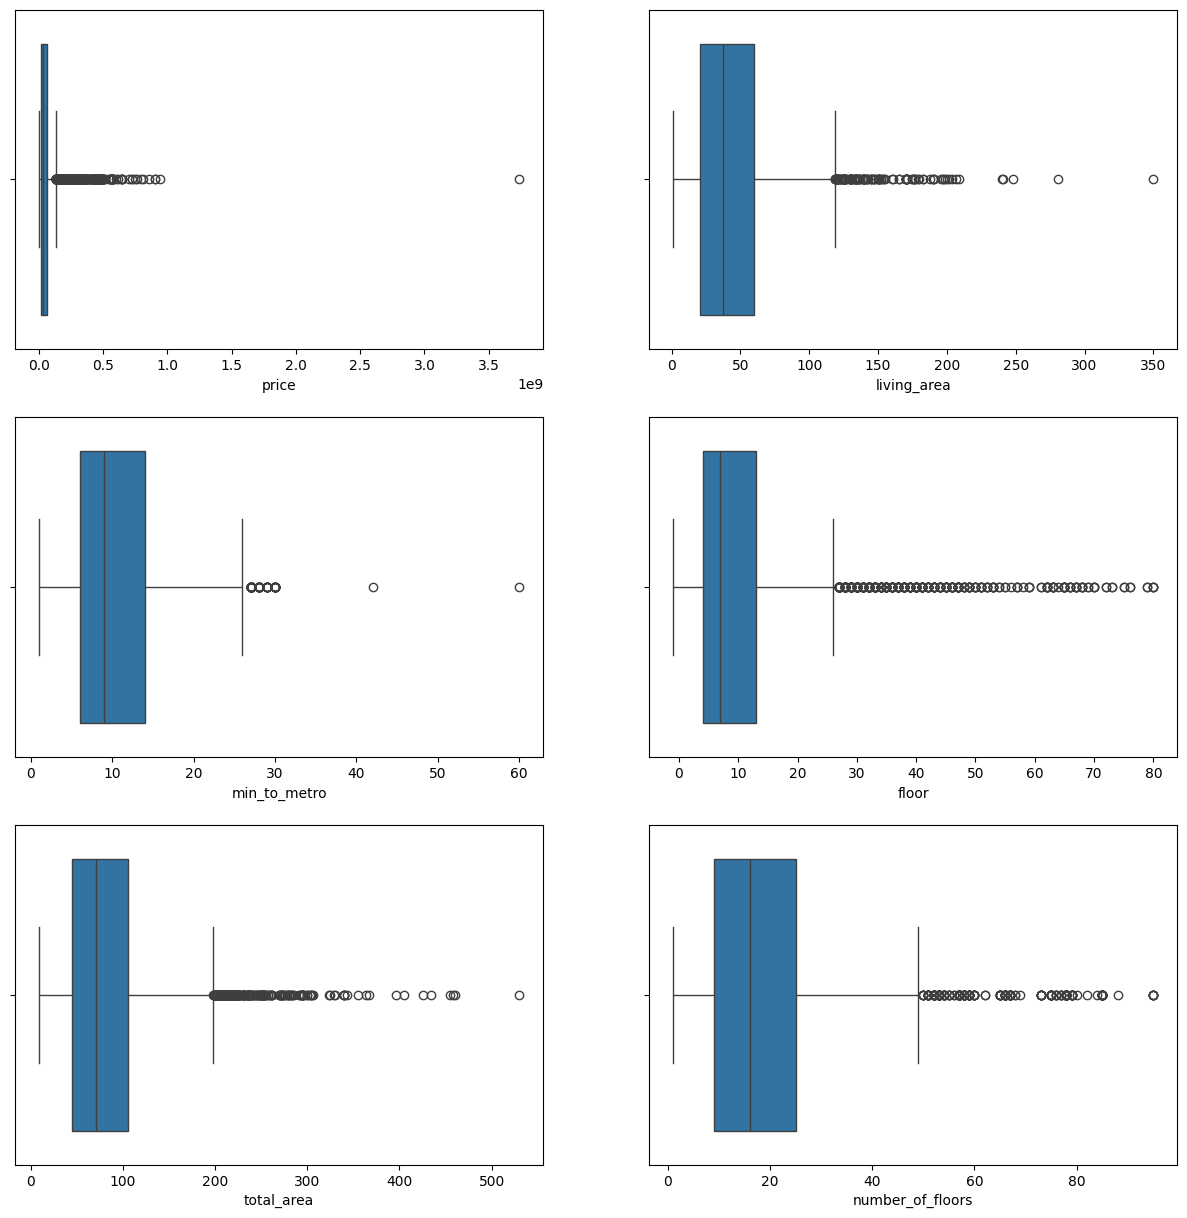

In [40]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
count = 0
for idx, feature in enumerate(df[num_columns].columns):
    
    sns.boxplot(x=df[feature], ax=axes[count % 3, count // 3])
    count += 1

"Наиболее" значительные выбросы по моему мнению у целевого признака, не так много квартир в мск, стоящих больше 300 млн рублей

In [41]:
df[df['price']>300000000].shape

(158, 20)

In [42]:
df.shape

(6946, 20)

In [43]:
df = df[df['price']<300000000]

<Axes: xlabel='price', ylabel='Count'>

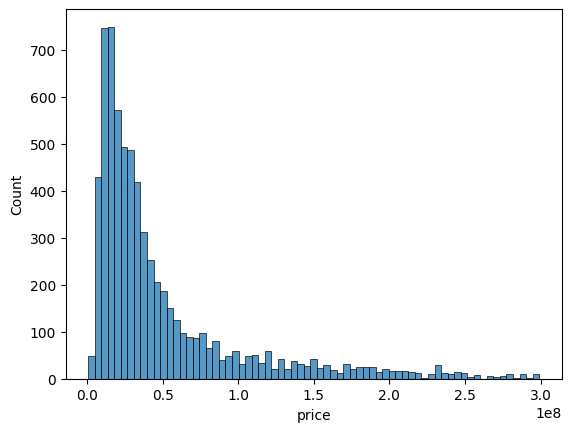

In [44]:
sns.histplot(x=df['price'])

Уже лучше, однако остается некоторое кол-во квартир дешевле какого-то разумного нижнего предела (по данным портала домклик в 2024 году минимальная стоимость квартиры в мск составила 4.7 млн рублей). Эти случаи - продажа доли квартиры, что явно не относится к моей задаче. Так как проверить это можно лишь выборочно руками, придется отбросить все квартиры, цена которых ниже 3 млн рублей (с запасом)

In [45]:
df[df['price']<3000000]

,price,min_to_metro,total_area,living_area,floor,number_of_floors,construction_year,is_new,is_apartments,ceiling_height,number_of_rooms,link,reg_ЗАО,reg_САО,reg_СВАО,reg_СЗАО,reg_ЦАО,reg_ЮАО,reg_ЮВАО,reg_ЮЗАО
1103,1300000.0,11.0,36.7,NaN,1.0,9.0,NaN,0.0,0.0,NaN,2.0,https://www.cian.ru/sale/flat/295919515/,False,False,False,False,False,False,False,False
1663,1000000.0,3.0,52.9,30.7,6.0,12.0,NaN,0.0,0.0,NaN,2.0,https://www.cian.ru/sale/flat/298377792/,False,False,True,False,False,False,False,False
2628,2250000.0,7.0,30.6,20.0,3.0,5.0,1962.0,0.0,0.0,NaN,1.0,https://www.cian.ru/sale/flat/295666829/,True,False,False,False,False,False,False,False
2815,2900000.0,19.0,56.0,30.0,5.0,5.0,NaN,0.0,0.0,2.8,1.0,https://www.cian.ru/sale/flat/300427156/,False,False,False,False,False,False,False,False
2925,2120000.0,14.0,13.8,5.8,1.0,16.0,2001.0,0.0,1.0,3.0,1.0,https://www.cian.ru/sale/flat/299098459/,False,False,False,False,False,False,True,False
3034,2250000.0,15.0,31.6,18.0,1.0,5.0,1967.0,0.0,0.0,NaN,1.0,https://www.cian.ru/sale/flat/298991779/,False,True,False,False,False,False,False,False
3170,2200000.0,17.0,34.9,NaN,5.0,16.0,NaN,0.0,0.0,2.5,1.0,https://www.cian.ru/sale/flat/296830781/,False,False,False,False,False,False,False,True
3447,2500000.0,7.0,38.0,19.0,4.0,17.0,NaN,0.0,0.0,NaN,1.0,https://www.cian.ru/sale/flat/293269136/,False,False,False,True,False,False,False,False
3601,800000.0,12.0,40.0,NaN,6.0,14.0,2009.0,0.0,0.0,2.9,1.0,https://www.cian.ru/sale/flat/300459829/,False,False,False,False,False,False,False,True


In [46]:
df = df[df['price']>3000000]

<Axes: xlabel='price', ylabel='Count'>

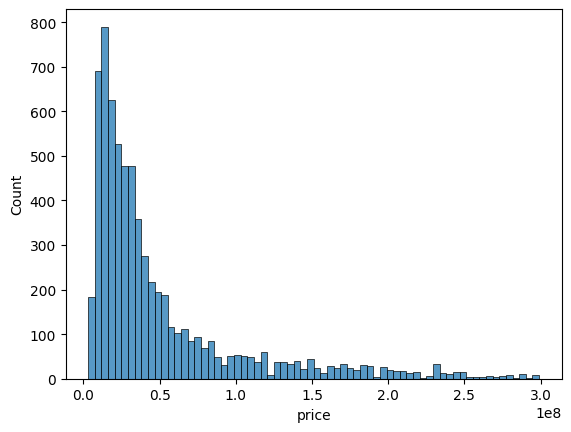

In [47]:
sns.histplot(x=df['price']) # нормальное распределение с длинныыыыым правым хвостом

Распределения числовых признаков

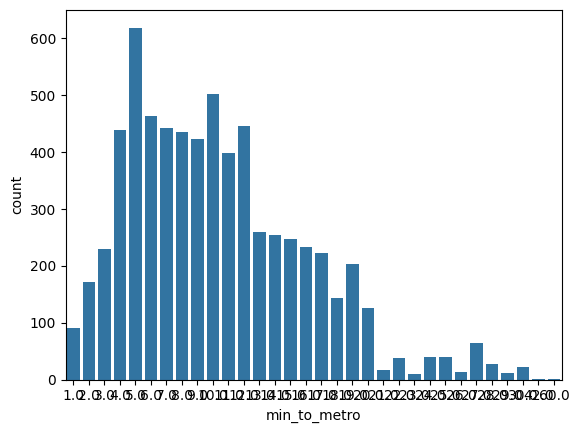

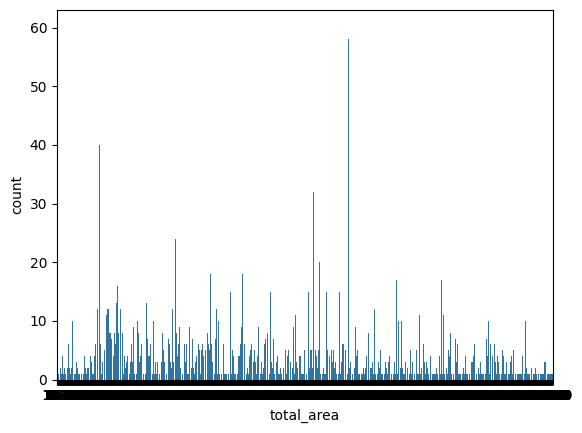

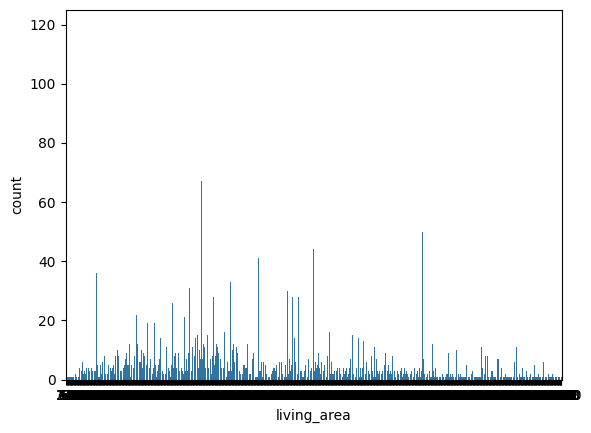

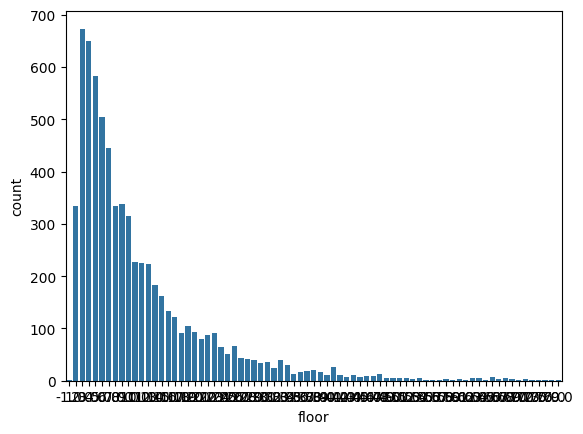

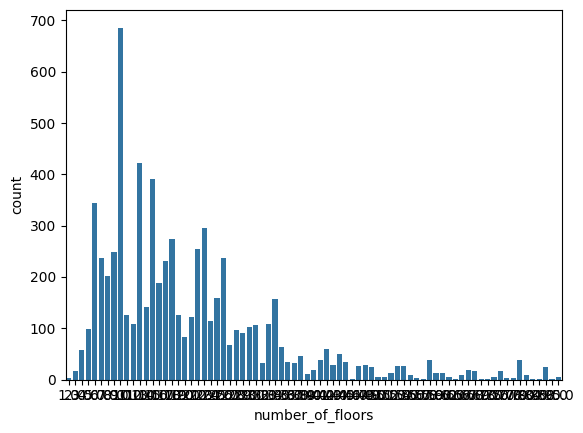

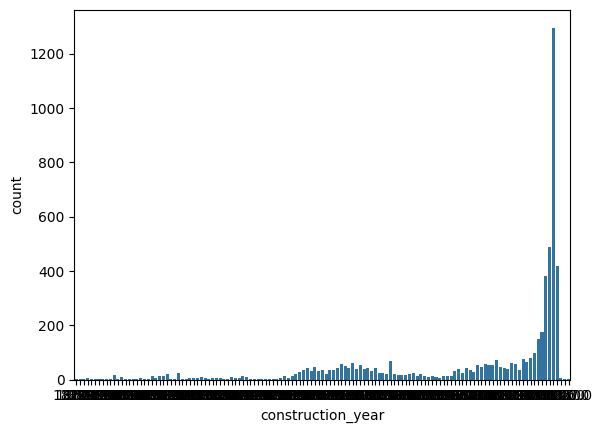

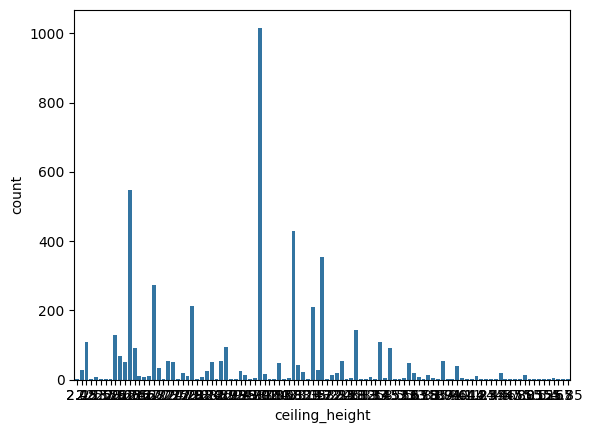

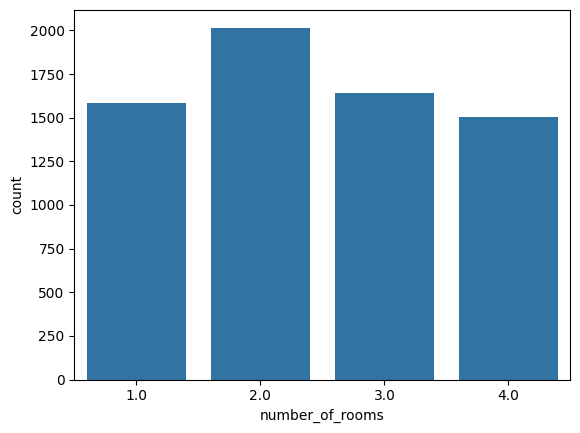

In [48]:
for col in df[num_columns]:
    if col!='price':
        sns.countplot(x=df[col], data=df)
        plt.show()

получились очень ненаглядные графики, посмотрим на попарные графики признаков с целевой переменной и таблицу корреляции

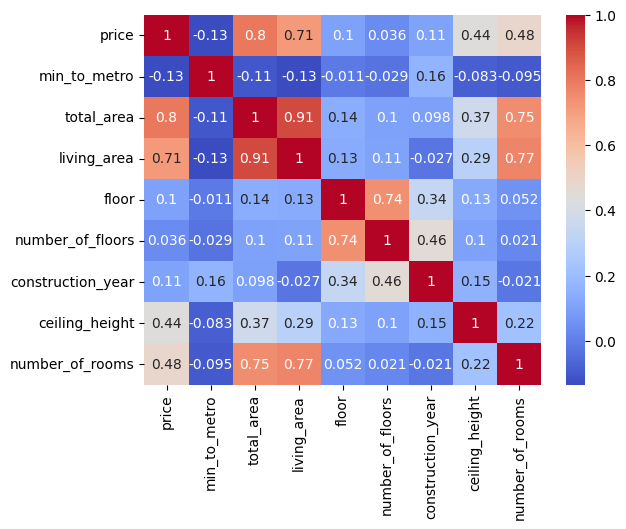

In [49]:
sns.heatmap(df[num_columns].corr(), annot=True, cmap='coolwarm')
plt.show()

Очень высокая линейная зависимость у номера этажа и кол-во этажей в доме (что логично), аналогично с жилой площадью, кол-вом комнат и общей площадью квартиры. Оставлю из них floor и number_of_rooms (корреляция больше с целевым признаком)

In [50]:
col_to_drop.extend(['number_of_floors','living_area','total_area'])

In [51]:
df.columns

Index(['price', 'min_to_metro', 'total_area', 'living_area', 'floor',
       'number_of_floors', 'construction_year', 'is_new', 'is_apartments',
       'ceiling_height', 'number_of_rooms', 'link', 'reg_ЗАО', 'reg_САО',
       'reg_СВАО', 'reg_СЗАО', 'reg_ЦАО', 'reg_ЮАО', 'reg_ЮВАО', 'reg_ЮЗАО'],
      dtype='object')

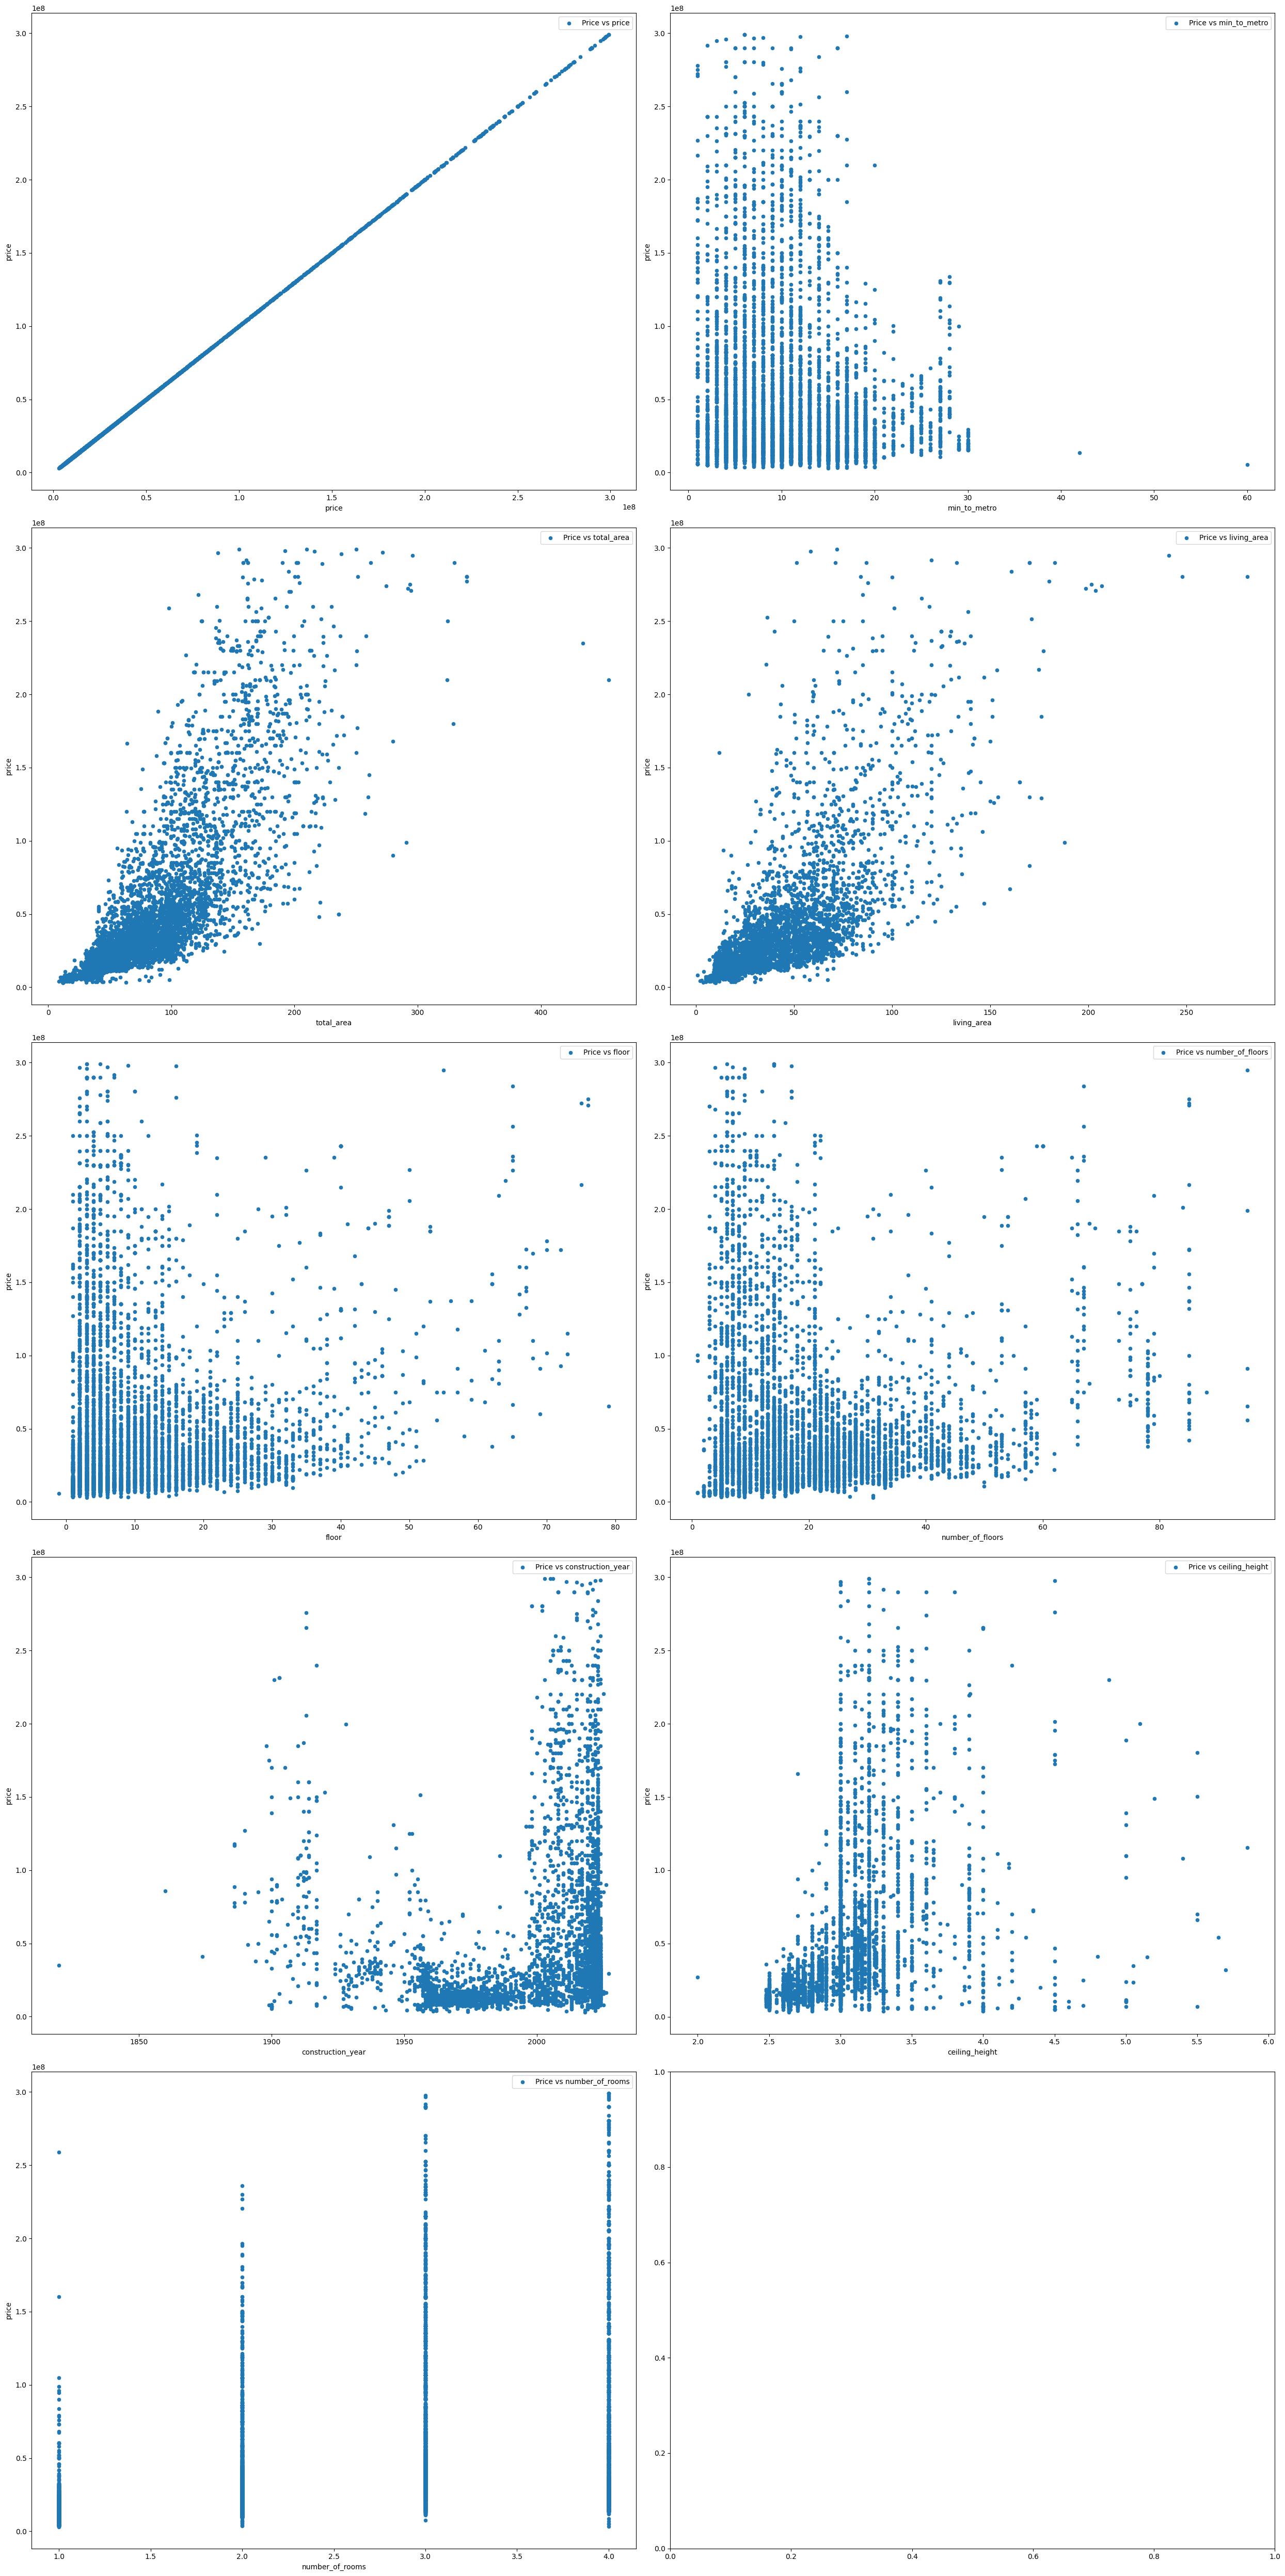

In [52]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(25, 50))
for idx, feature in enumerate(df[num_columns]):
    row, col = divmod(idx, 2)
    df.plot(x=feature, y="price", kind="scatter", ax=axes[row, col], label=f'Price vs {feature}')

plt.tight_layout()
plt.show()

Графики living_area, total_area схожи, как этаж и кол-во этажей.

In [53]:
df.drop(columns=col_to_drop)

,price,min_to_metro,floor,construction_year,is_new,is_apartments,ceiling_height,number_of_rooms,reg_ЗАО,reg_САО,reg_СВАО,reg_СЗАО,reg_ЦАО,reg_ЮАО,reg_ЮВАО,reg_ЮЗАО
0,31633073.0,24.0,11.0,2023.0,1.0,0.0,3.15,2.0,False,False,False,False,False,True,False,False
1,29293000.0,9.0,9.0,2022.0,1.0,0.0,NaN,2.0,False,False,True,False,False,False,False,False
2,30349669.0,5.0,3.0,2023.0,1.0,0.0,3.15,2.0,False,False,False,False,False,True,False,False
3,31845511.0,19.0,2.0,2024.0,1.0,0.0,2.97,2.0,False,False,False,False,False,True,False,False
4,38810000.0,27.0,9.0,2023.0,1.0,0.0,3.00,2.0,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6978,29504877.0,6.0,3.0,NaN,0.0,0.0,NaN,4.0,False,True,False,False,False,False,False,False
6979,120000000.0,2.0,6.0,1998.0,0.0,0.0,3.00,4.0,False,False,False,False,True,False,False,False
6980,165000000.0,7.0,16.0,2023.0,0.0,0.0,NaN,4.0,False,False,False,False,True,False,False,False
6981,21500000.0,11.0,2.0,NaN,0.0,0.0,2.80,4.0,False,False,False,False,False,False,True,False


В задании также указано провести стандартизацию или нормализацию, а также обработать пропущенные значения, но перед разбиением на train/test/val этого лучше не делать во избежании утечки данных.
